In [300]:
import numpy as np
from scipy import stats as sts
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

# ЦПД и Распределение Парето (python3)

Функция распределения:
$$ F_X(x) = P(X < x) = 1 - (\frac{x_m}{x})^k , \forall x \geq x_m $$

Функция плотности:
$$ f_X(x) = \begin{cases} kx_m^k, &  x \geq x_m \\ 0, & x < x_m \end{cases} $$

Математическое ожидание:
$$ \mu = \frac{kx_m}{k-1} \ , при \ k > 1 $$ 

Дисперсия:
$$ \sigma^2 = (\frac{x_m}{k-1})^2 \frac{k}{k-2} \ , при \ k > 2 $$

## Функция плотности распределения Парето

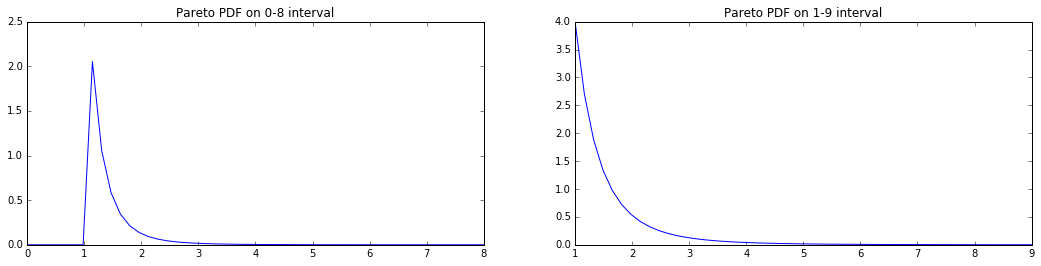

In [301]:
param_k = 4 # > 2, что бы посчитать дисперсию
param_x = 1 # > 1, что бы посчитать мат. ожидание
pareto_rv = sts.pareto(param_k)

x = np.linspace(0,8)
y = pareto_rv.pdf(x)

fig, axes = plt.subplots(ncols=2)
fig.set_figwidth(18)
axes[0].plot(x,y)
axes[0].set_title('Pareto PDF on 0-8 interval') # Для наглядности на интервале от 2 до 8
axes[1].plot(np.linspace(1,9),pareto_rv.pdf(np.linspace(1,5)))
axes[1].set_title('Pareto PDF on 1-9 interval') # А так просто симпотичнее смотрится на интервале от 3 до 8

Вычисляем матожидание и дисперсию

In [302]:
mu = (param_k * param_x) / (param_k - 1) # матожидание распределения Парето
sigma_sq = np.power((param_x / (param_k - 1)), 2) * (param_k / (param_k - 2)) # дисперсия распределения Парето
print('mu = {} sigma = {}'.format(mu, sigma_sq))

mu = 1.3333333333333333 sigma = 0.2222222222222222


Генерируем выборки из нашего распределения

In [303]:
n = [5,10,50,100,500] # Размеры выборок
sample_size = 1000

# Генерируем 1000 выборок по n штук итеративно и сразу берем среднее 
mean_samples = np.array([[np.mean(pareto_rv.rvs(size)) for i in range(sample_size)] for size in n]) 
#Заворачиваем в pandas для удобства рисования (или тупо для практики)
mean_samples_df = pd.DataFrame(mean_samples.T, columns=n) 

Рисуем графики: гистограммы для выборок и приближенные функции плотности с помощью ЦПТ

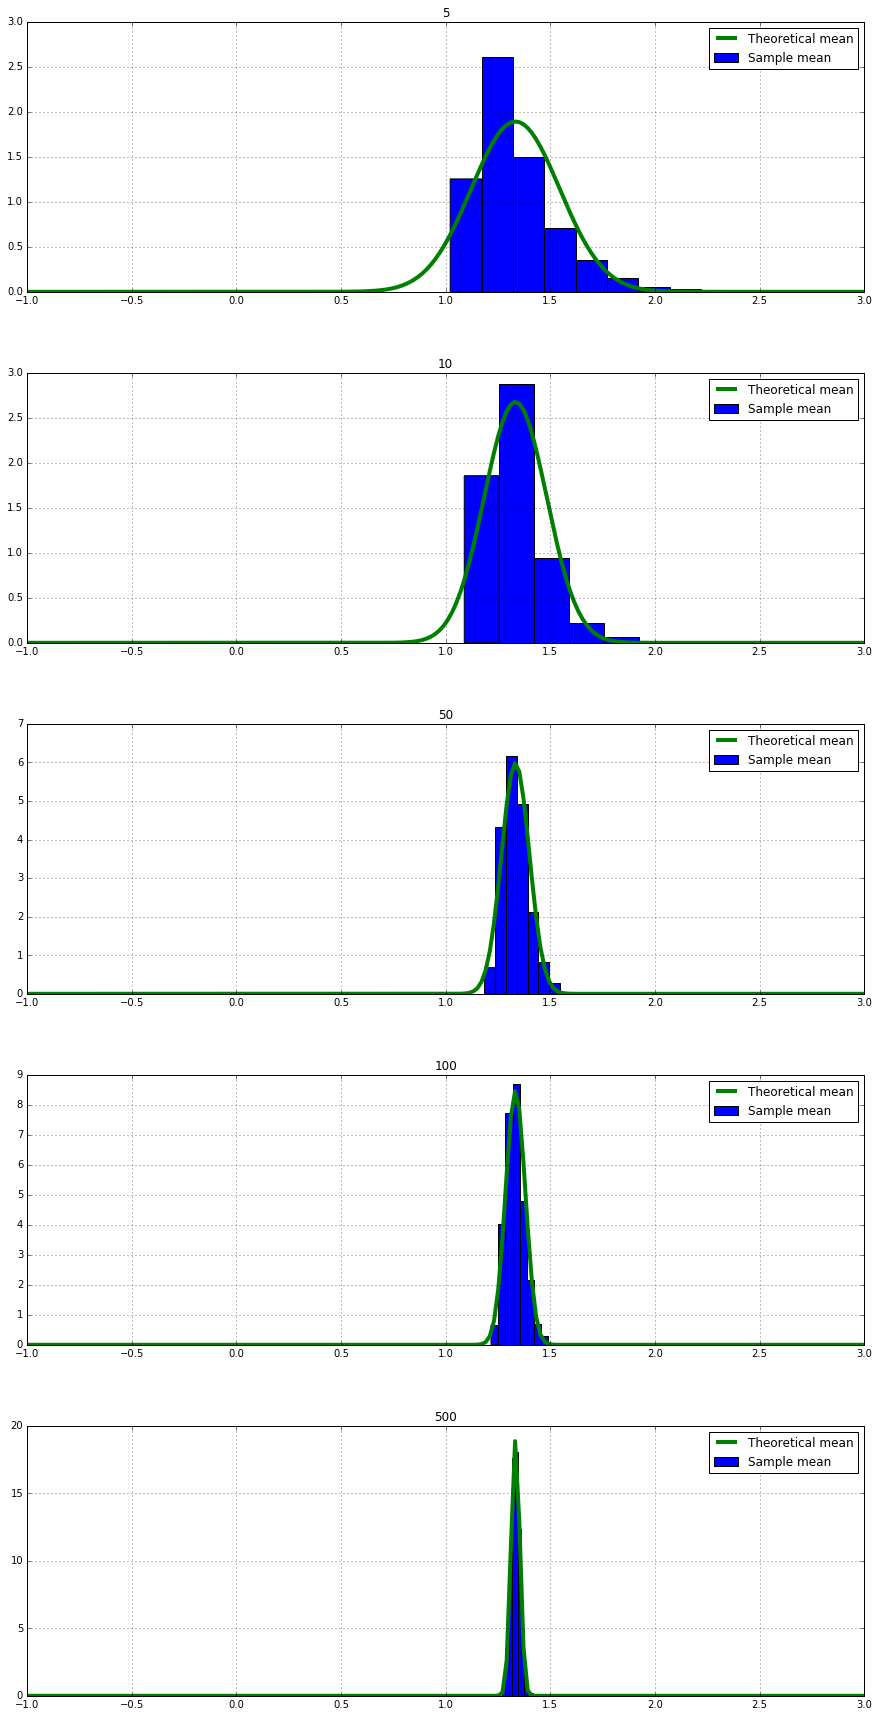

In [306]:
clt_norm_rv = [sts.norm(mu, np.sqrt(sigma_sq/size)) for size in n]
norm_x = np.linspace(-1,3, 200)

ax = mean_samples_df.hist(figsize=(15, 30), bins=10, normed=True, layout=(len(n),1), label='Sample mean')
ax[0,0].legend()

for plot_num in range(len(n)):
    ax[plot_num, 0].plot(norm_x, clt_norm_rv[plot_num].pdf(norm_x), lw=4, label='Theoretical mean')
    ax[plot_num,0].legend()

## Заключение
Как видно, для маленьких n реаспределение среднего по выборке скошено слева(что в целом визуально схоже с тем как выглядит оригинальная функция плотности для распределения Парето), но с ростом n оно все больше напоминает нормальное. 